## Assignment: PCA Implementation

In [2]:
# Objective:


# The objective of this assignment is to implement PCA on a given dataset and analyse the results

# Instructions:

# Download the wine dataset from the UCI Machine Learning Repository 

  (https://archive.ics.uci.edu/ml/datasets/Wine). 

# Load the dataset into a Pandas dataframe.

# Split the dataset into features and target variables.

# Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

# Implement PCA on the preprocessed dataset using the scikit-learn library.

# Determine the optimal number of principal components to retain based on the explained variance ratio.

# Visualise the results of PCA using a scatter plot.

# Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

# Interpret the results of PCA and clustering analysis.

# Deliverables:

# Jupyter notebook containing the code for the PCA implementation.

# A report summarising the results of PCA and clustering analysis.

# Scatter plot showing the results of PCA.

# A table showing the performance metrics for the clustering algorithm.
# Additional Information:

# You can use the python programming language.

# You can use any other machine learning libraries or tools as necessary.

# You can use any visualisation libraries or tools as necessary.

IndentationError: unexpected indent (1731722910.py, line 10)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [52]:
# Step 1: Download and load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)

In [53]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [54]:
# Step 2: Split the dataset into features and target variables
X = df.drop(0, axis=1)
y = df[0]

In [55]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [56]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

In [57]:
# Step 3: Data preprocessing - scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [81]:
# Step 4: Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_train)

In [82]:
# Step 5: Determine the optimal number of principal components
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

In [83]:
explained_variance_ratio 

array([0.36889046, 0.18019428, 0.11848794, 0.07730147, 0.07137246,
       0.04340044, 0.03471583, 0.02750532, 0.0215109 , 0.01925756,
       0.0167457 , 0.01288131, 0.00773635])

In [84]:
cumulative_variance_ratio 

array([0.36889046, 0.54908473, 0.66757267, 0.74487414, 0.8162466 ,
       0.85964704, 0.89436286, 0.92186818, 0.94337908, 0.96263664,
       0.97938234, 0.99226365, 1.        ])

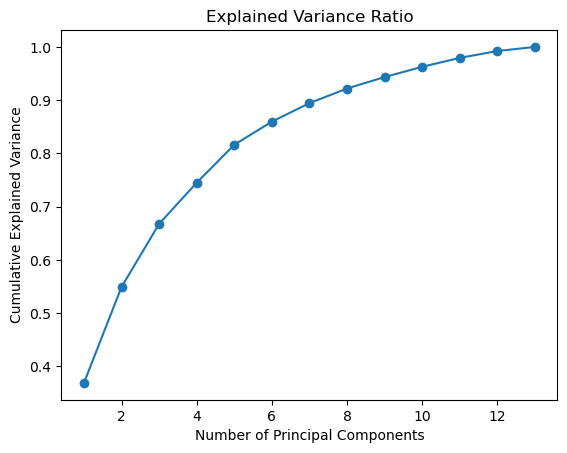

In [85]:
# Plot explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance Ratio")
plt.show()

In [86]:
# Step 7: Perform K-Means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [87]:
kmeans

KMeans(n_clusters=3)

In [88]:
cluster_labels

array([1, 2, 0, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 0, 2, 0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 1,
       0, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 1, 0, 0, 1, 0, 0], dtype=int32)

In [89]:
# Step 8: Interpret the results
# The scatter plot of PCA results shows the data projected onto the first two principal components.
# Each data point is represented by its values along these two components.
# Clustering analysis is performed on the PCA-transformed data using the K-Means algorithm.
# The resulting cluster labels indicate which cluster each data point belongs to.